In [1]:
import datacube
import xarray as xr
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import utils.dc_utilities as utilities
dc = datacube.Datacube(app = 'my_app', config = '/home/localuser/.datacube.conf') 
import dc_au_colormaps

urban_class = xr.open_dataset('2016urban_class.nc')

In [2]:
urban_class

<xarray.Dataset>
Dimensions:     (latitude: 2671, longitude: 3837)
Coordinates:
  * longitude   (longitude) float64 121.0 121.0 121.0 121.0 121.0 121.0 ...
  * latitude    (latitude) float64 25.31 25.31 25.31 25.31 25.31 25.31 25.31 ...
Data variables:
    ndvi        (latitude, longitude) float64 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 ...
    ndbi_swir1  (latitude, longitude) float64 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 ...
    FC          (latitude, longitude) float64 255.0 255.0 255.0 255.0 255.0 ...

In [3]:
i = 1000
j = 1000
(urban_class.latitude.values[i], urban_class.longitude.values[j])
urban_class.ndvi[i][j]

<xarray.DataArray 'ndvi' ()>
array(-9999.)
Coordinates:
    longitude  float64 121.2
    latitude   float64 25.04

In [36]:
from utils.dc_display_map import display_map
lon = (urban_class.longitude.values[j], urban_class.longitude.values[j])
lat = (urban_class.latitude.values[i], urban_class.latitude.values[i])
display_map(latitude = lat, longitude = lon)

In [4]:
ndvi_array = urban_class.ndvi.values.reshape((1,urban_class.ndvi.values.size))[0]
ndbi_swir1_array = urban_class.ndbi_swir1.values.reshape((1,urban_class.ndbi_swir1.values.size))[0]
FC_array = urban_class.FC.values.reshape((1,urban_class.FC.values.size))[0]

In [45]:
ndvi_array.reshape((urban_class.ndvi.values.shape[0],urban_class.ndvi.values.shape[1]))

array([[-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [ 0.85645663,  0.85930798,  0.86280753, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.86345865,  0.85191538,  0.85701981, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.85557987,  0.8420448 ,  0.85196467, ..., -0.        ,
        -0.        , -0.        ]])

In [46]:
urban_class.ndvi.values

array([[-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [ 0.85645663,  0.85930798,  0.86280753, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.86345865,  0.85191538,  0.85701981, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.85557987,  0.8420448 ,  0.85196467, ..., -0.        ,
        -0.        , -0.        ]])

In [5]:
from sklearn import preprocessing, linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/home/localuser/Datacube/datacube_env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/localuser/Datacube/datacube_env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/localuser/Datacube/datacube_env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/localuser/Datacube/datacube_env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
data = {'ndvi_array': ndvi_array, 'ndbi_swir1_array': ndbi_swir1_array, 'FC_array': FC_array}

In [7]:
df = pd.DataFrame(data=data)

In [8]:
urban_result = xr.open_dataset('2016urban_result.nc')
y = urban_result.classification.values.reshape((1,urban_result.classification.values.size))[0]

In [9]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(df, y,test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(x1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
predicted_classes = model.predict(x1_test)
predicted_classes

array([1., 0., 0., ..., 0., 1., 0.])

In [12]:
accuracy = accuracy_score(y1_test.flatten(),predicted_classes)
accuracy

0.9604156848281185

In [13]:
parameters = model.coef_
parameters

array([[ -0.04778063,  10.64616974, -10.59635796]])

In [85]:
predicted_classes.reshape((urban_result.classification.values.shape[0],urban_result.classification.values.shape[1]))

ValueError: cannot reshape array of size 2049726 into shape (2671,3837)

In [14]:
test = xr.DataArray(predicted_classes.reshape((urban_result.classification.values.shape[0],urban_result.classification.values.shape[1])), dims = urban_result.classification.dims, coords = urban_result.classification.coords)

ValueError: cannot reshape array of size 2049726 into shape (2671,3837)

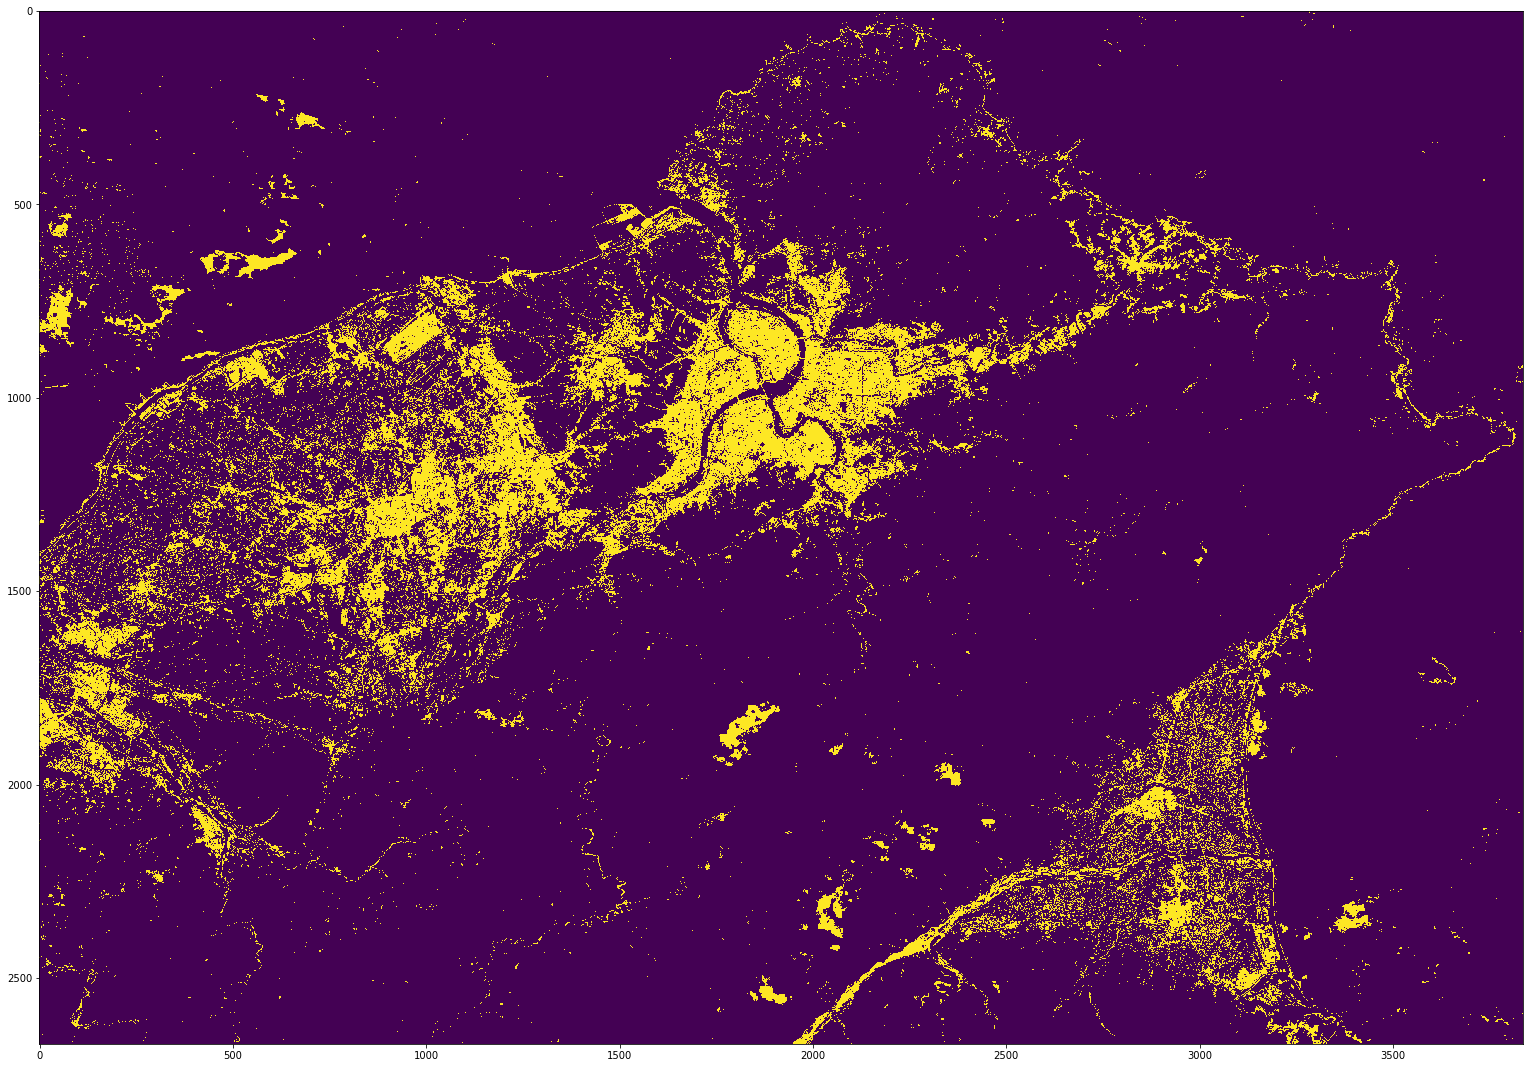

In [73]:
max_val = test.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (test/ max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')

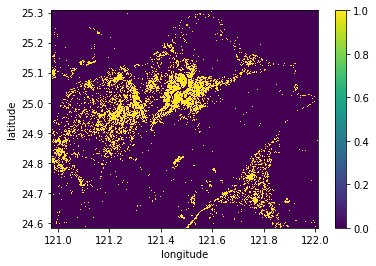

In [74]:
test.plot()

In [36]:
urban_class_2015 = xr.open_dataset('2013urban_class.nc')

In [37]:
data_2015 = {'ndvi_array': urban_class_2015.ndvi.values.reshape((1,urban_class_2015.ndvi.values.size))[0], 'ndbi_swir1_array': urban_class_2015.ndbi_swir1.values.reshape((1,urban_class_2015.ndbi_swir1.values.size))[0], 'FC_array': urban_class_2015.FC.values.reshape((1,urban_class_2015.FC.values.size))[0]}
X_2015 = pd.DataFrame(data=data_2015)

In [38]:
predicted_classes_2015 = model.predict(X_2015)

In [39]:
final_2015 = xr.DataArray(predicted_classes_2015.reshape((urban_result.classification.values.shape[0],urban_result.classification.values.shape[1])), dims = urban_result.classification.dims, coords = urban_result.classification.coords)

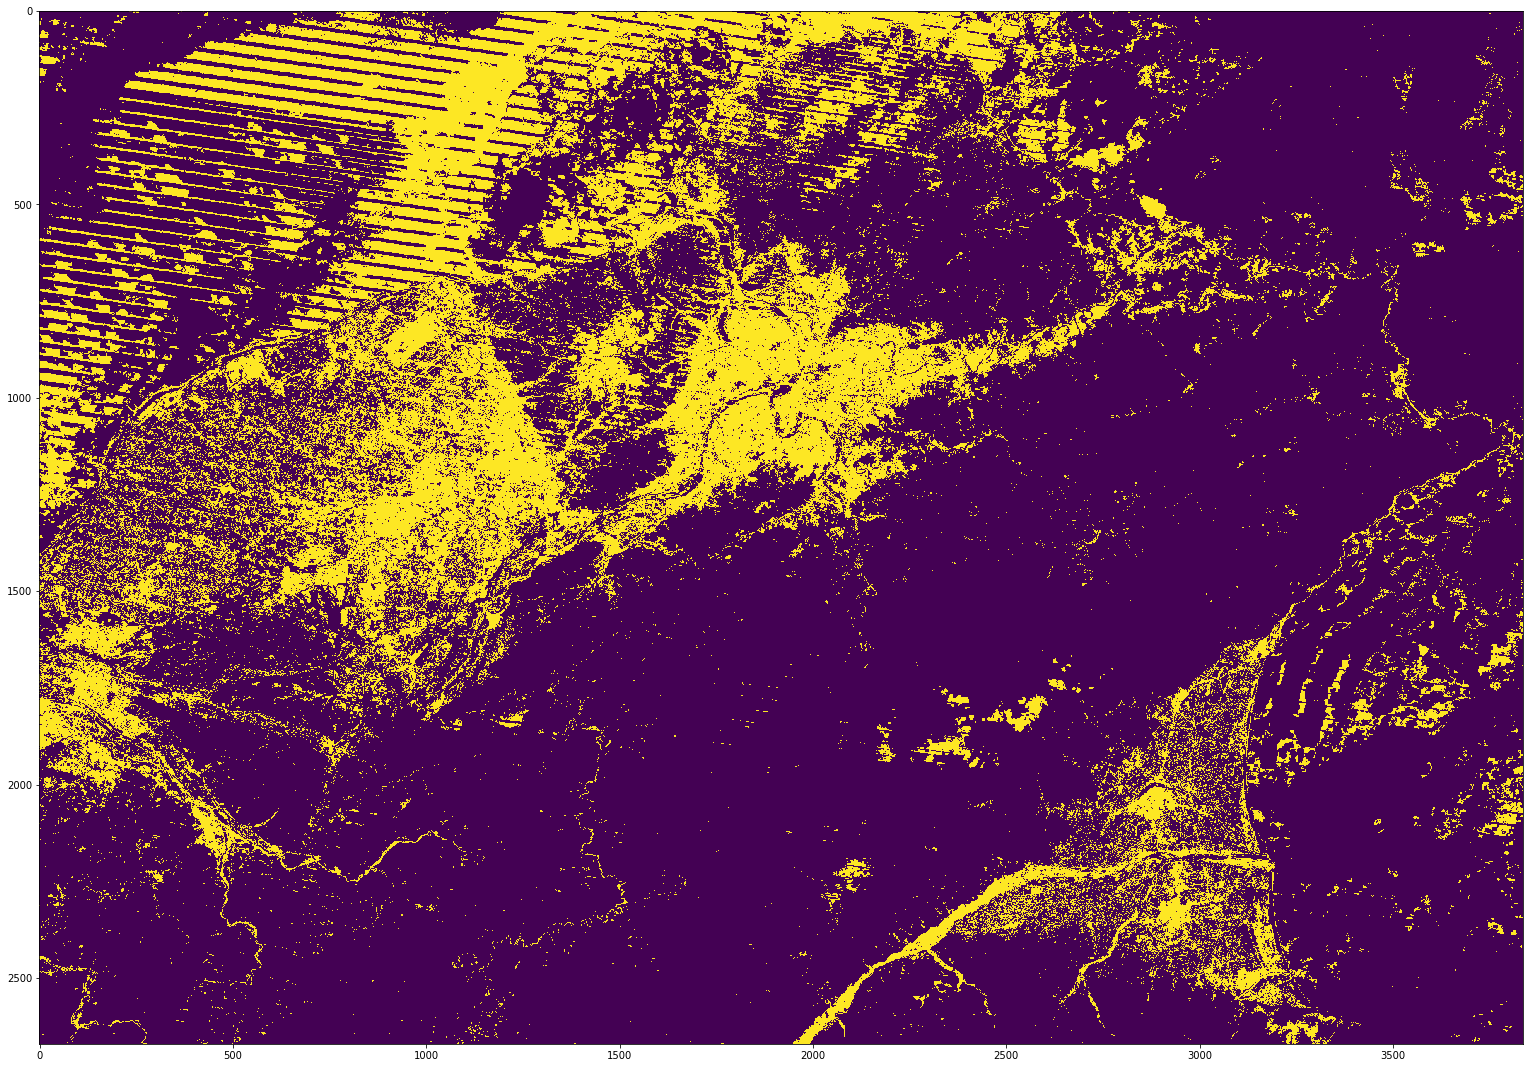

In [40]:
max_val = final_2015.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (final_2015/ max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')

In [35]:
from utils.dc_utilities import write_geotiff_from_xr, write_png_from_xr

write_geotiff_from_xr("/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/2014_urban_class.tiff", final_2015.to_dataset(name = "class"),['class'], nodata=0, crs="EPSG:4326")